# Keras Extra feladat

In [12]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Enable loading of truncated images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [13]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

train_gen = datagen.flow_from_directory(
    "C:\\Users\\USER\\.cache\\kagglehub\\datasets\\misrakahmed\\vegetable-image-dataset\\versions\\1\\Vegetable Images\\train",
    target_size=(120, 120),
    batch_size=512,
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    "C:\\Users\\USER\\.cache\\kagglehub\\datasets\\misrakahmed\\vegetable-image-dataset\\versions\\1\\Vegetable Images\\validation",
    target_size=(120, 120),
    batch_size=512,
    class_mode="categorical"
)

print(len(train_gen))

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
30


In [14]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG19(weights="imagenet", include_top=False, input_shape=(120, 120, 3))

base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
output_layer = Dense(15, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',  tf.keras.metrics.Recall()])

history = model.fit(train_gen, epochs=2, validation_data=val_gen)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 120, 120, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,89

 Total params: 21,239,119 (81.02 MB)

 Trainable params: 1,214,735 (4.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 315s 11s/step - accuracy: 0.5106 - loss: 1.7809 - recall_1: 0.2300 - val_accuracy: 0.8950 - val_loss: 0.3816 - val_recall_1: 0.8407
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 319s 11s/step - accuracy: 0.9255 - loss: 0.2727 - recall_1: 0.8901 - val_accuracy: 0.9573 - val_loss: 0.1753 - val_recall_1: 0.9343


In [15]:
from sklearn.metrics import confusion_matrix

val_labels = []
val_preds = []

for images, labels in val_gen: 
    preds = model.predict(images) 
    val_preds.extend(np.argmax(preds, axis=1)) 
    val_labels.extend(np.argmax(labels, axis=1))

    if len(val_labels) >= val_gen.samples:
        break

val_labels = np.array(val_labels)
val_preds = np.array(val_preds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 590ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 581ms/step


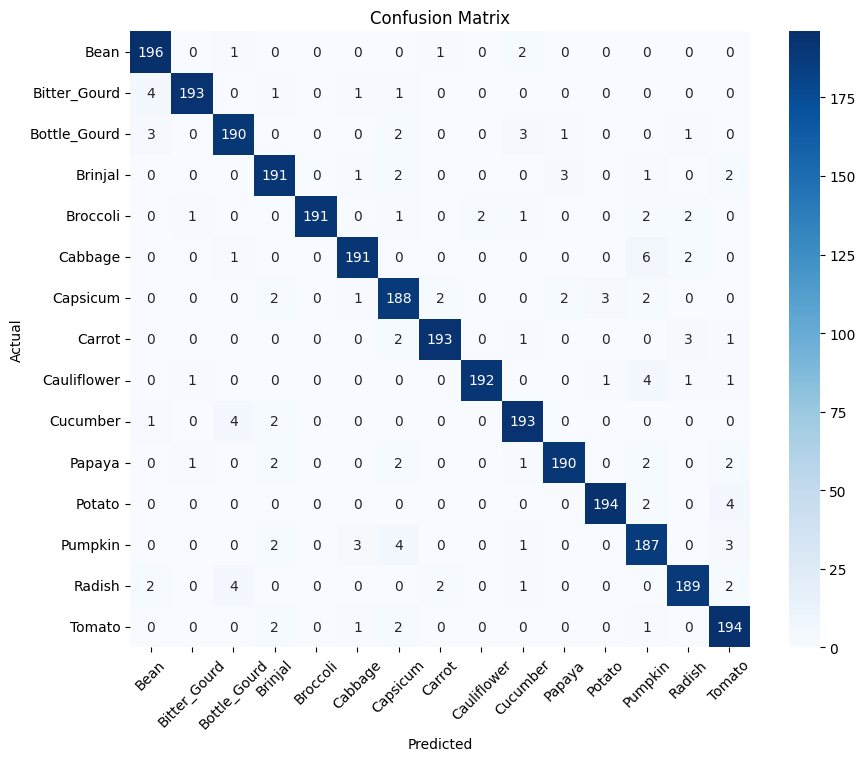

In [ ]:
conf_matrix = confusion_matrix(val_labels, val_preds)

class_labels = list(val_gen.class_indices.keys())
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()